<a href="https://colab.research.google.com/github/ritwikad07/Covid-Data-Analysis/blob/main/Data_Science_Major_Project_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv')

In [ ]:
df.head()

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0


In [ ]:
print(f"Data available for {df['Date'].unique().size} days")

Data available for 276 days


In [ ]:
df_clean =df.drop(["Province/State"], axis=1)
df_clean.head()

,Date,Country/Region,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0.0,0
1,2020-01-23,Afghanistan,0,0.0,0
2,2020-01-24,Afghanistan,0,0.0,0
3,2020-01-25,Afghanistan,0,0.0,0
4,2020-01-26,Afghanistan,0,0.0,0


In [ ]:
df_clean.describe()

,Confirmed,Recovered,Deaths
count,7.369200e+04,6.982800e+04,73692.000000
mean,4.525668e+04,2.939999e+04,1666.877192
std,3.423302e+05,2.259835e+05,10565.168873
min,0.000000e+00,0.000000e+00,0.000000
25%,1.700000e+01,4.000000e+00,0.000000
50%,4.660000e+02,2.170000e+02,6.000000
75%,4.990500e+03,2.367000e+03,96.000000
max,8.491459e+06,6.948497e+06,223975.000000


In [ ]:
df_clean.describe(include="O")

,Date,Country/Region
count,73692,73692
unique,276,189
top,2020-07-13,China
freq,267,9108


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73692 entries, 0 to 73691
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            73692 non-null  object 
 1   Country/Region  73692 non-null  object 
 2   Confirmed       73692 non-null  int64  
 3   Recovered       69828 non-null  float64
 4   Deaths          73692 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.8+ MB


In [ ]:
df_clean['Date'] = pd.to_datetime(df_clean['Date'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73692 entries, 0 to 73691
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            73692 non-null  datetime64[ns]
 1   Country/Region  73692 non-null  object        
 2   Confirmed       73692 non-null  int64         
 3   Recovered       69828 non-null  float64       
 4   Deaths          73692 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 2.8+ MB


In [ ]:
df_clean

,Date,Country/Region,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0.0,0
1,2020-01-23,Afghanistan,0,0.0,0
2,2020-01-24,Afghanistan,0,0.0,0
3,2020-01-25,Afghanistan,0,0.0,0
4,2020-01-26,Afghanistan,0,0.0,0
...,...,...,...,...,...
73687,2020-10-19,Zimbabwe,8159,7683.0,232
73688,2020-10-20,Zimbabwe,8187,7692.0,233
73689,2020-10-21,Zimbabwe,8215,7725.0,236
73690,2020-10-22,Zimbabwe,8242,7742.0,236


In [ ]:
df_clean=df_clean.sort_values(by='Date')

In [ ]:
df_clean[30:55]

,Date,Country/Region,Confirmed,Recovered,Deaths
276,2020-01-22,Albania,0,0.0,0
58788,2020-01-22,San Marino,0,0.0,0
73416,2020-01-22,Zimbabwe,0,0.0,0
14628,2020-01-22,Central African Republic,0,0.0,0
59064,2020-01-22,Sao Tome and Principe,0,0.0,0
46092,2020-01-22,Luxembourg,0,0.0,0
27600,2020-01-22,Denmark,0,0.0,0
14352,2020-01-22,Canada,0,NaN,0
60996,2020-01-22,Slovakia,0,0.0,0
57960,2020-01-22,Saint Kitts and Nevis,0,0.0,0


In [ ]:
df_clean.isna().sum()

Date                 0
Country/Region       0
Confirmed            0
Recovered         3864
Deaths               0
dtype: int64

In [ ]:
df_missing_recovery = df_clean[df_clean.isnull().any(axis=1)]
df_missing_recovery.describe(include="O")

,Country/Region
count,3864
unique,1
top,Canada
freq,3864


In [ ]:
df[df['Country/Region'] == "Canada"]

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
10764,2020-01-22,Canada,Alberta,0,NaN,0
10765,2020-01-23,Canada,Alberta,0,NaN,0
10766,2020-01-24,Canada,Alberta,0,NaN,0
10767,2020-01-25,Canada,Alberta,0,NaN,0
10768,2020-01-26,Canada,Alberta,0,NaN,0
...,...,...,...,...,...,...
14623,2020-10-19,Canada,Yukon,17,NaN,0
14624,2020-10-20,Canada,Yukon,17,NaN,0
14625,2020-10-21,Canada,Yukon,17,NaN,0
14626,2020-10-22,Canada,Yukon,17,NaN,0


In [ ]:
df_clean.dropna(inplace=True)
df_clean.head()

,Date,Country/Region,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0.0,0
59616,2020-01-22,Senegal,0,0.0,0
59892,2020-01-22,Serbia,0,0.0,0
45540,2020-01-22,Liechtenstein,0,0.0,0
28152,2020-01-22,Diamond Princess,0,0.0,0


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69828 entries, 0 to 73691
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            69828 non-null  datetime64[ns]
 1   Country/Region  69828 non-null  object        
 2   Confirmed       69828 non-null  int64         
 3   Recovered       69828 non-null  float64       
 4   Deaths          69828 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 3.2+ MB


In [ ]:
df_clean['Recovered'] = df_clean['Recovered'].astype(int)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69828 entries, 0 to 73691
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            69828 non-null  datetime64[ns]
 1   Country/Region  69828 non-null  object        
 2   Confirmed       69828 non-null  int64         
 3   Recovered       69828 non-null  int64         
 4   Deaths          69828 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 3.2+ MB


## Visualisation:

## Bar Plot

<BarContainer object of 73692 artists>

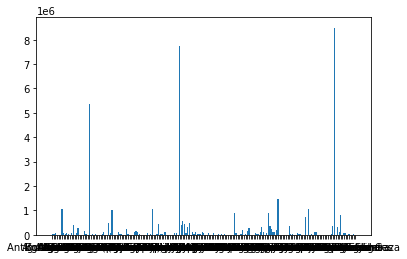

In [55]:
import matplotlib.pyplot as plt 
plt.bar(df['Country/Region'],df['Confirmed'])

## Pivot Table

In [56]:
dfPivot = pd.pivot_table(df, values='Confirmed', columns='Date', index= 'Country/Region')
dfPivot

Date,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,...,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18,2020-09-19,2020-09-20,2020-09-21,2020-09-22,2020-09-23,2020-09-24,2020-09-25,2020-09-26,2020-09-27,2020-09-28,2020-09-29,2020-09-30,2020-10-01,2020-10-02,2020-10-03,2020-10-04,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-09,2020-10-10,2020-10-11,2020-10-12,2020-10-13,2020-10-14,2020-10-15,2020-10-16,2020-10-17,2020-10-18,2020-10-19,2020-10-20,2020-10-21,2020-10-22,2020-10-23
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,38772.0,38815.0,38855.0,38872.0,38883.0,38919.0,39044.0,39074.0,39096.0,39145.0,39170.0,39186.0,39192.0,39227.0,39233.0,39254.0,39268.0,39285.0,39290.0,39297.0,39341.0,39422.0,39486.0,39548.0,39616.0,39693.0,39703.0,39799.0,39870.0,39928.0,39994.0,40026.0,40073.0,40141.0,40200.0,40287.0,40357.0,40510.0,40626.0,40687.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11520.0,11672.0,11816.0,11948.0,12073.0,12226.0,12385.0,12535.0,12666.0,12787.0,12921.0,13045.0,13153.0,13259.0,13391.0,13518.0,13649.0,13806.0,13965.0,14117.0,14266.0,14410.0,14568.0,14730.0,14899.0,15066.0,15231.0,15399.0,15570.0,15752.0,15955.0,16212.0,16501.0,16774.0,17055.0,17350.0,17651.0,17948.0,18250.0,18556.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,48496.0,48734.0,48966.0,49194.0,49413.0,49623.0,49826.0,50023.0,50214.0,50400.0,50579.0,50754.0,50914.0,51067.0,51213.0,51368.0,51530.0,51690.0,51847.0,51995.0,52136.0,52270.0,52399.0,52520.0,52658.0,52804.0,52940.0,53072.0,53325.0,53399.0,53584.0,53777.0,53998.0,54203.0,54402.0,54616.0,54829.0,55081.0,55357.0,55630.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1438.0,1438.0,1483.0,1483.0,1564.0,1564.0,1564.0,1681.0,1681.0,1753.0,1753.0,1836.0,1836.0,1836.0,1966.0,1966.0,2050.0,2050.0,2110.0,2110.0,2110.0,2370.0,2370.0,2568.0,2568.0,2696.0,2696.0,2696.0,2995.0,2995.0,3190.0,3190.0,3377.0,3377.0,3377.0,3623.0,3623.0,3811.0,3811.0,4038.0
Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3439.0,3569.0,3675.0,3789.0,3848.0,3901.0,3991.0,4117.0,4236.0,4363.0,4475.0,4590.0,4672.0,4718.0,4797.0,4905.0,4972.0,5114.0,5211.0,5370.0,5402.0,5530.0,5725.0,5725.0,5958.0,6031.0,6246.0,6366.0,6488.0,6680.0,6846.0,7096.0,7222.0,7462.0,7622.0,7829.0,8049.0,8338.0,8582.0,8829.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31362.0,32250.0,33006.0,33843.0,34401.0,35003.0,35686.0,36151.0,36580.0,37083.0,37591.0,37963.0,38253.0,38703.0,39121.0,3

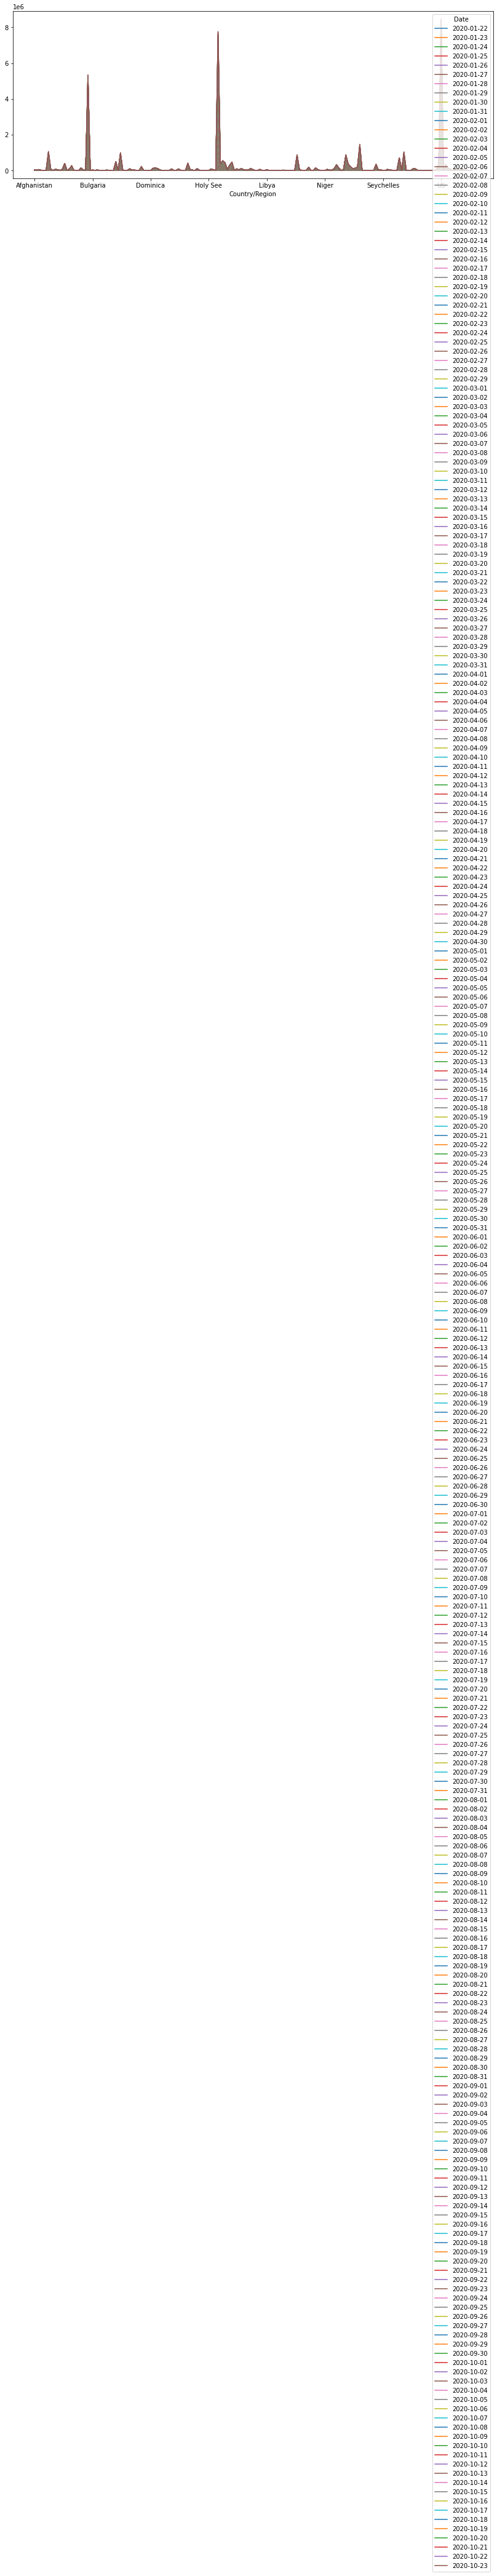

In [57]:
dfPivot.plot(figsize=(14,5))

## Line Plot

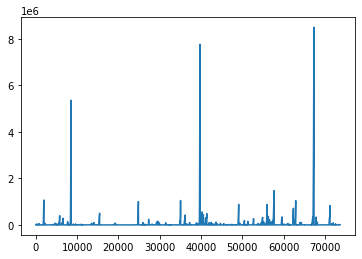

In [81]:
df['Confirmed'].plot()

In [82]:
df.columns

Index(['Date', 'Country/Region', 'Province/State', 'Confirmed', 'Recovered',
       'Deaths', 'Total_Cases', 'Recovery_Rate'],
      dtype='object')

In [83]:
df['Total_Cases']= df['Confirmed'] + df['Recovered'] +df['Deaths']

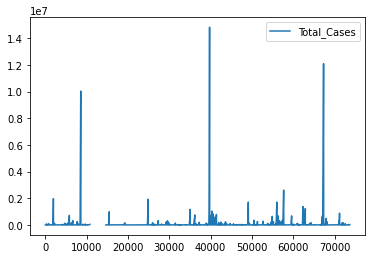

In [84]:
df.plot(kind='line',y=['Total_Cases'])

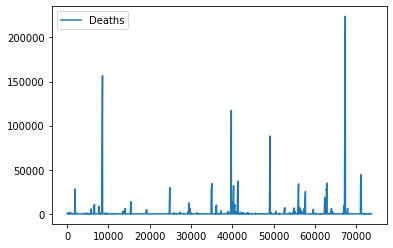

In [85]:
df.plot(kind='line',y=['Deaths'])

## Maximum Value of Total Cases

In [86]:
column = df['Total_Cases']
max_value = column.max()
print(max_value)
df[df["Total_Cases"]== max_value]["Country/Region"]

14827115.0


39742    India
39743    India
Name: Country/Region, dtype: object

## Maximum Value of Confirmed/Active Cases

In [89]:
max_value1 = df['Confirmed'].max()
print(max_value1)
df[df["Confirmed"]== max_value1]["Country/Region"]

8491459


67343    US
Name: Country/Region, dtype: object

### Recovery Rate

In [90]:
df['Recovery_Rate']= df['Recovered']/ df['Total_Cases']

## Maximum Value of Recovery Rate

In [66]:
column1 = df['Recovery_Rate']
max_value2 = column1.max()
df[df["Recovery_Rate"]== max_value2]["Country/Region"]

4332    Australia
Name: Country/Region, dtype: object

## Maximum Recovered People

In [67]:
column2 = df['Recovered']
max_value3 = column2.max()
df[df["Recovered"]== max_value3]["Country/Region"]

39742    India
39743    India
Name: Country/Region, dtype: object

## Maximum Deaths

In [68]:
Column = df['Deaths']
max_value4 = Column.max()
df[df["Deaths"]== max_value4]["Country/Region"]

67343    US
Name: Country/Region, dtype: object

## Forecasting

In [69]:
covid_data_prophet = df_clean.drop(["Country/Region"], axis=1)
covid_data_prophet = covid_data_prophet.groupby("Date").sum()
covid_data_prophet.reset_index(level=0, inplace=True)
covid_data_prophet

,Date,Confirmed,Recovered,Deaths
0,2020-01-22,555,28,17
1,2020-01-23,654,30,18
2,2020-01-24,941,36,26
3,2020-01-25,1434,39,42
4,2020-01-26,2117,52,56
...,...,...,...,...
271,2020-10-19,40191416,27525512,1108327
272,2020-10-20,40577076,27733819,1114896
273,2020-10-21,41018140,27948066,1121425
274,2020-10-22,41484058,28172518,1127277


In [70]:
covid_data_prophet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       276 non-null    datetime64[ns]
 1   Confirmed  276 non-null    int64         
 2   Recovered  276 non-null    int64         
 3   Deaths     276 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 8.8 KB


In [71]:
covid_prophet_confirmed = covid_data_prophet.drop(["Recovered", "Deaths"], axis=1)
covid_prophet_confirmed = covid_prophet_confirmed.rename(columns={"Date": "ds", "Confirmed": "y"})
covid_prophet_confirmed.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2117


In [72]:
from fbprophet import Prophet
prophet_confirmed = Prophet()
prophet_confirmed.fit(covid_prophet_confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [73]:
covid_prophet_recovered = covid_data_prophet.drop(["Confirmed", "Deaths"], axis=1)
covid_prophet_recovered = covid_prophet_recovered.rename(columns={"Date": "ds", "Recovered": "y"})
covid_prophet_recovered.head()

,ds,y
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52


In [74]:
prophet_recovered = Prophet()
prophet_recovered.fit(covid_prophet_recovered)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [75]:
covid_prophet_deaths = covid_data_prophet.drop(["Confirmed", "Recovered"], axis=1)
covid_prophet_deaths = covid_prophet_deaths.rename(columns={"Date": "ds", "Deaths": "y"})
covid_prophet_deaths.head()

,ds,y
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56


In [76]:
prophet_deaths = Prophet()
prophet_deaths.fit(covid_prophet_deaths)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [77]:
future_confirmed = prophet_confirmed.make_future_dataframe(periods=1095)
future_recovered = prophet_recovered.make_future_dataframe(periods=1095)
future_deaths = prophet_deaths.make_future_dataframe(periods=1095)

forecast_confirmed = prophet_confirmed.predict(future_confirmed)
forecast_recovered = prophet_recovered.predict(future_recovered)
forecast_deaths = prophet_deaths.predict(future_deaths)

### Confirmed Cases Prediction

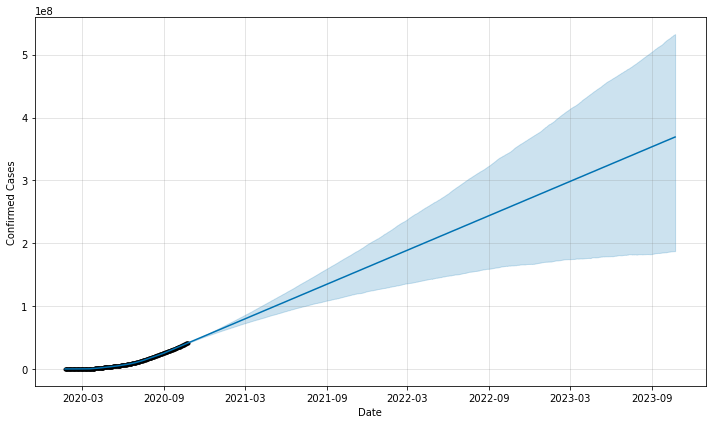

In [78]:
confirmed_plot = prophet_confirmed.plot(forecast_confirmed, xlabel="Date", ylabel="Confirmed Cases")

### Recovered Cases Prediction

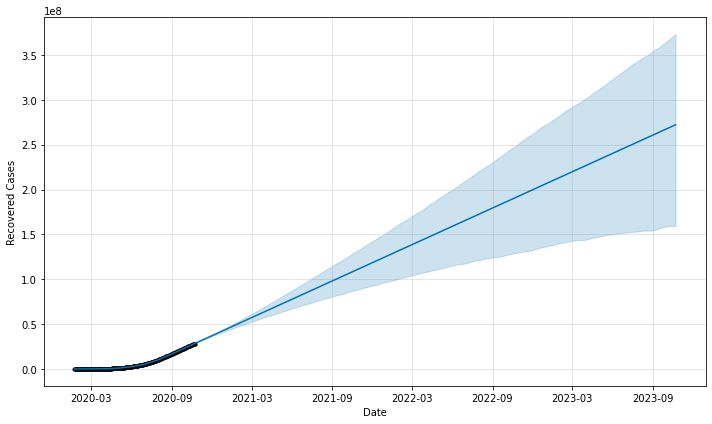

In [79]:
recovered_plot = prophet_recovered.plot(forecast_recovered, xlabel="Date", ylabel="Recovered Cases")

### Deaths Prediction

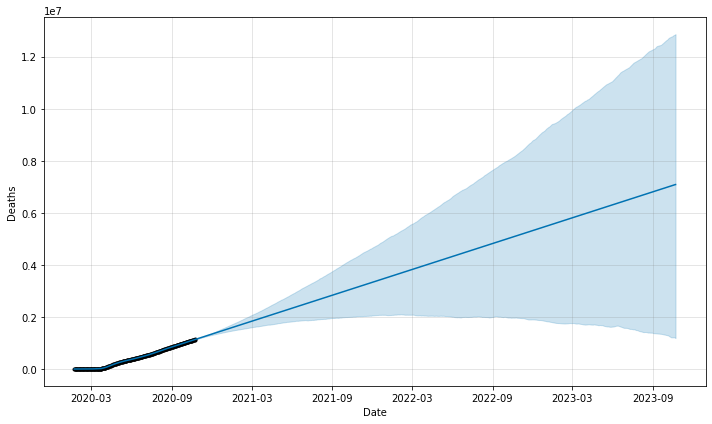

In [80]:
death_plot = prophet_deaths.plot(forecast_deaths, xlabel="Date", ylabel="Deaths")

COVID-19 DATA ANALYSIS
The current situation is extremely overwhelming. The days are getting harder day by day. People are losing their jobs, dying out of Covid and their families are getting shattered. Even after taking every little precautions, people are losing their ability to fight this virus.
Everyone is waiting for the day when this nasty killing virus would stop spreading and a vaccine would be provided to every individuals regardless of their race, gender, caste, creed etc.
The main motive is to flatten the curve. The faster the infection curve rises, the quicker the local health care system gets overloaded beyond its capacity to treat people. As we're seeing in Italy, more and more new patients may be forced to go without ICU beds, and more and more hospitals may run out of the basic supplies they need to respond to the outbreak. 
A flatter curve, on the other hand, assumes the same number of people ultimately get infected, but over a longer period of time. A slower infection rate means a less stressed health care system, fewer hospital visits on any given day and fewer sick people being turned away. 
In this project, I have analysed the whole dataset whose source is Johns Hopkins University Center for Systems Science and Engineering.
All the codes have been written in Google Colab.
Since, this is a huge dataset. So, for reducing the data set for my own convenience, I had opted for Pivot Table which would take the necessary tables i.e, Confirmed cases, dates and country/region  into consideration.
Several plots have also been plotted by using matplotlib.
The code for the maximum cases has been shown in the Google Colaboratory file.

•	Total Number of cases: Everyday the cases are spiking up. This is the maximum value of total cases in the whole world is 14070273.0
•	Country with maximum total no. of cases: The country with maximum total number of cases are in India.
•	Worst affected country:
It is becoming impossible for several countries to control the outbreak of this deadly virus even after taking every possible precautions. By evaluating the total number of cases, we can see that the worstly affected country is India.
•	Highest number of active cases is 8106384.
•	Country with maximum number of active cases:  The country with maximum number of recovered cases is in the United States.
•	Maximum Recovery Rate - However, the rate of recoveries is a poor, if not meaningless, measure of a country’s response to its COVID-19 epidemic.  The maximum recovery rate is 0.500768049155146.
•	Country with Maximum Recovery Rate: This has been recorded in Australia. Recovery rate in a pandemic is not considered a scale to measure the success of containment strategy. The logic is simple that all those people who do not die during a pandemic, recover.

•	Maximum number of recovered people:-
           The only ray of hope which we can see is the number of recovery cases. This is a huge satisfaction in these crucial hours. The maximum number of recovered people are 38878.
•	Country with maximum number of recovered people:
          The country with maximum number of recovered people are in India.
•	Maximum number of Deaths: The maximum number of deaths has been recorded a figure of 65879 in the United states.